In [1]:
import parent as parent

In [2]:
file_path = 'Data/LaFleur_supp.csv'
df = parent.load_and_preprocess_data(file_path)

In [3]:
# parent.plot_saliency_map_sequence('TTTTGTATCTACGTACTTGACACTATTTCCTATTTCTCTTATAATATGATTACTCTACCTTAGTTTGTACGTT', multiplier=2)

In [4]:
# parent.plot_saliency_map_grid(i_start=100, i_end=200)

In [5]:
split_data, file_names = parent.split_data_by_file(df)

In [6]:
# all_results = parent.repeat_evalute_each_file(file_names, split_data, 10)
# parent.save_repeat_evalute_each_file(all_results)

In [7]:
# all_results = parent.load_repeat_evalute_each_file()

# parent.save_repeat_evalute_each_file_statistics(all_results, split_data, file_names)
# parent.plot_repeat_evalute_each_file(file_names, all_results)

In [8]:
# individual_loss_values = parent.evalute_each_file(file_names, split_data)
# parent.save_loss_values_to_csv(individual_loss_values, 'Data/LaFleur_supp_loss_values.csv')

In [9]:
# individual_loss_values = parent.read_loss_values_from_csv('Data/LaFleur_supp_loss_values.csv')

In [10]:
# data_for_plot = parent.evaluate_file_combinations(file_names, split_data)
# parent.save_data_for_plot_to_csv(data_for_plot)

In [11]:
data_for_plot = parent.read_data_for_plot_from_csv('Data/data_comparison.csv')

In [12]:
# parent.plot_file_combinations(data_for_plot)

In [13]:
# parent.plot_individual_file_combinations(data_for_plot, file_names)
# parent.plot_individual_file_combinations_grid(data_for_plot, file_names)

In [14]:
from itertools import chain, combinations

all_combinations = list(chain.from_iterable(combinations(file_names, i) for i in range(1, len(file_names) + 1)))
file_mse = {tuple(sorted(each)) : None for each in all_combinations}
for each in data_for_plot:
    key = tuple(sorted(each[2].split(', ')))
    file_mse[key] = each[1]

mse_effect = {file : [] for file in file_names}

for key, value in file_mse.items():
    for file in file_names:
        if file in key:
            continue
        next_key = tuple(sorted(key + (file,)))
        mse_difference = value - file_mse[next_key]
        mse_effect[file].append(mse_difference)

for file, values in mse_effect.items():
    print(f'{file} : {sum(values) / len(values)}')


La Fleur et al : 0.7124987655796229
Urtecho et al : 1.0792166134722834
Hossain et al : 0.2723336249896227
Yu et al : 0.19967078090371476
Lagator et al 36N : 0.42179465557640766
Lagator et al Pl : 0.29749399875733334
Lagator et al Pr : 0.4370456297647129
Anderson et al : -0.010841134985545946
De Novo Designs : 0.10133105403506956


3 Files: t-statistic = -1.6549, p-value = 0.0989 
4 Files: t-statistic = -1.8086, p-value = 0.0711 
5 Files: t-statistic = 1.9555, p-value = 0.0511 
6 Files: t-statistic = -1.7941, p-value = 0.0748 


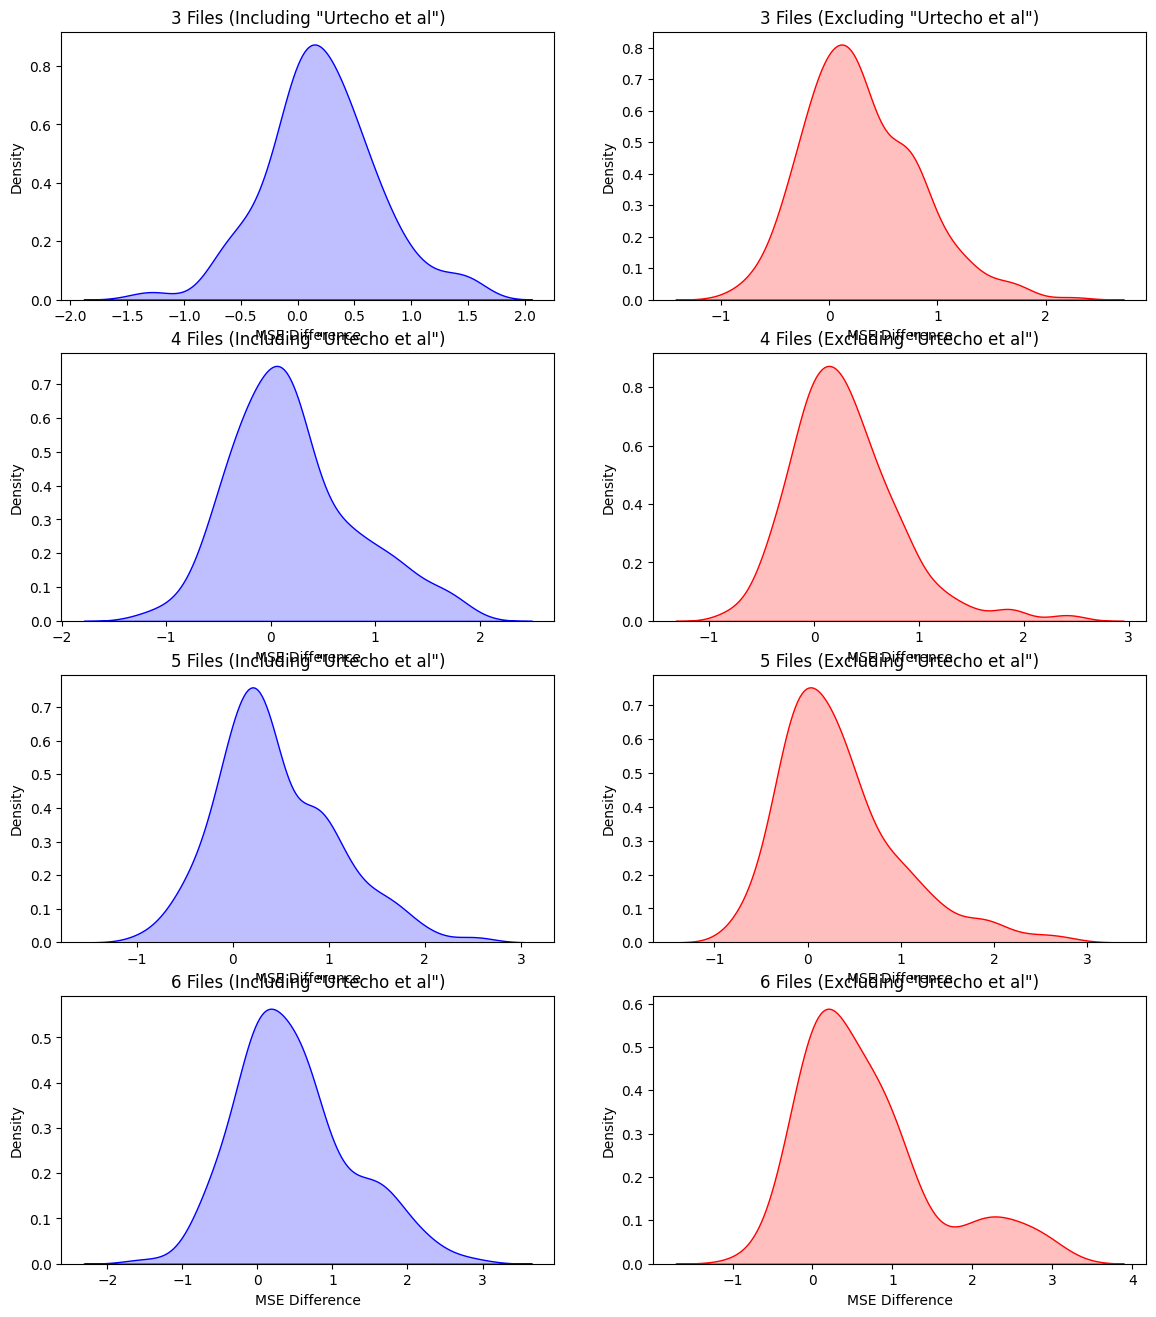

In [15]:
parent.plot_mse_effect_with_ttest(file_mse, file_names, 'Urtecho et al', start_from=3, end_at=6)

3 Files: t-statistic = -5.4735, p-value = 0.0000 (Significant)
4 Files: t-statistic = -8.0197, p-value = 0.0000 (Significant)
5 Files: t-statistic = -7.5630, p-value = 0.0000 (Significant)
6 Files: t-statistic = -9.8354, p-value = 0.0000 (Significant)


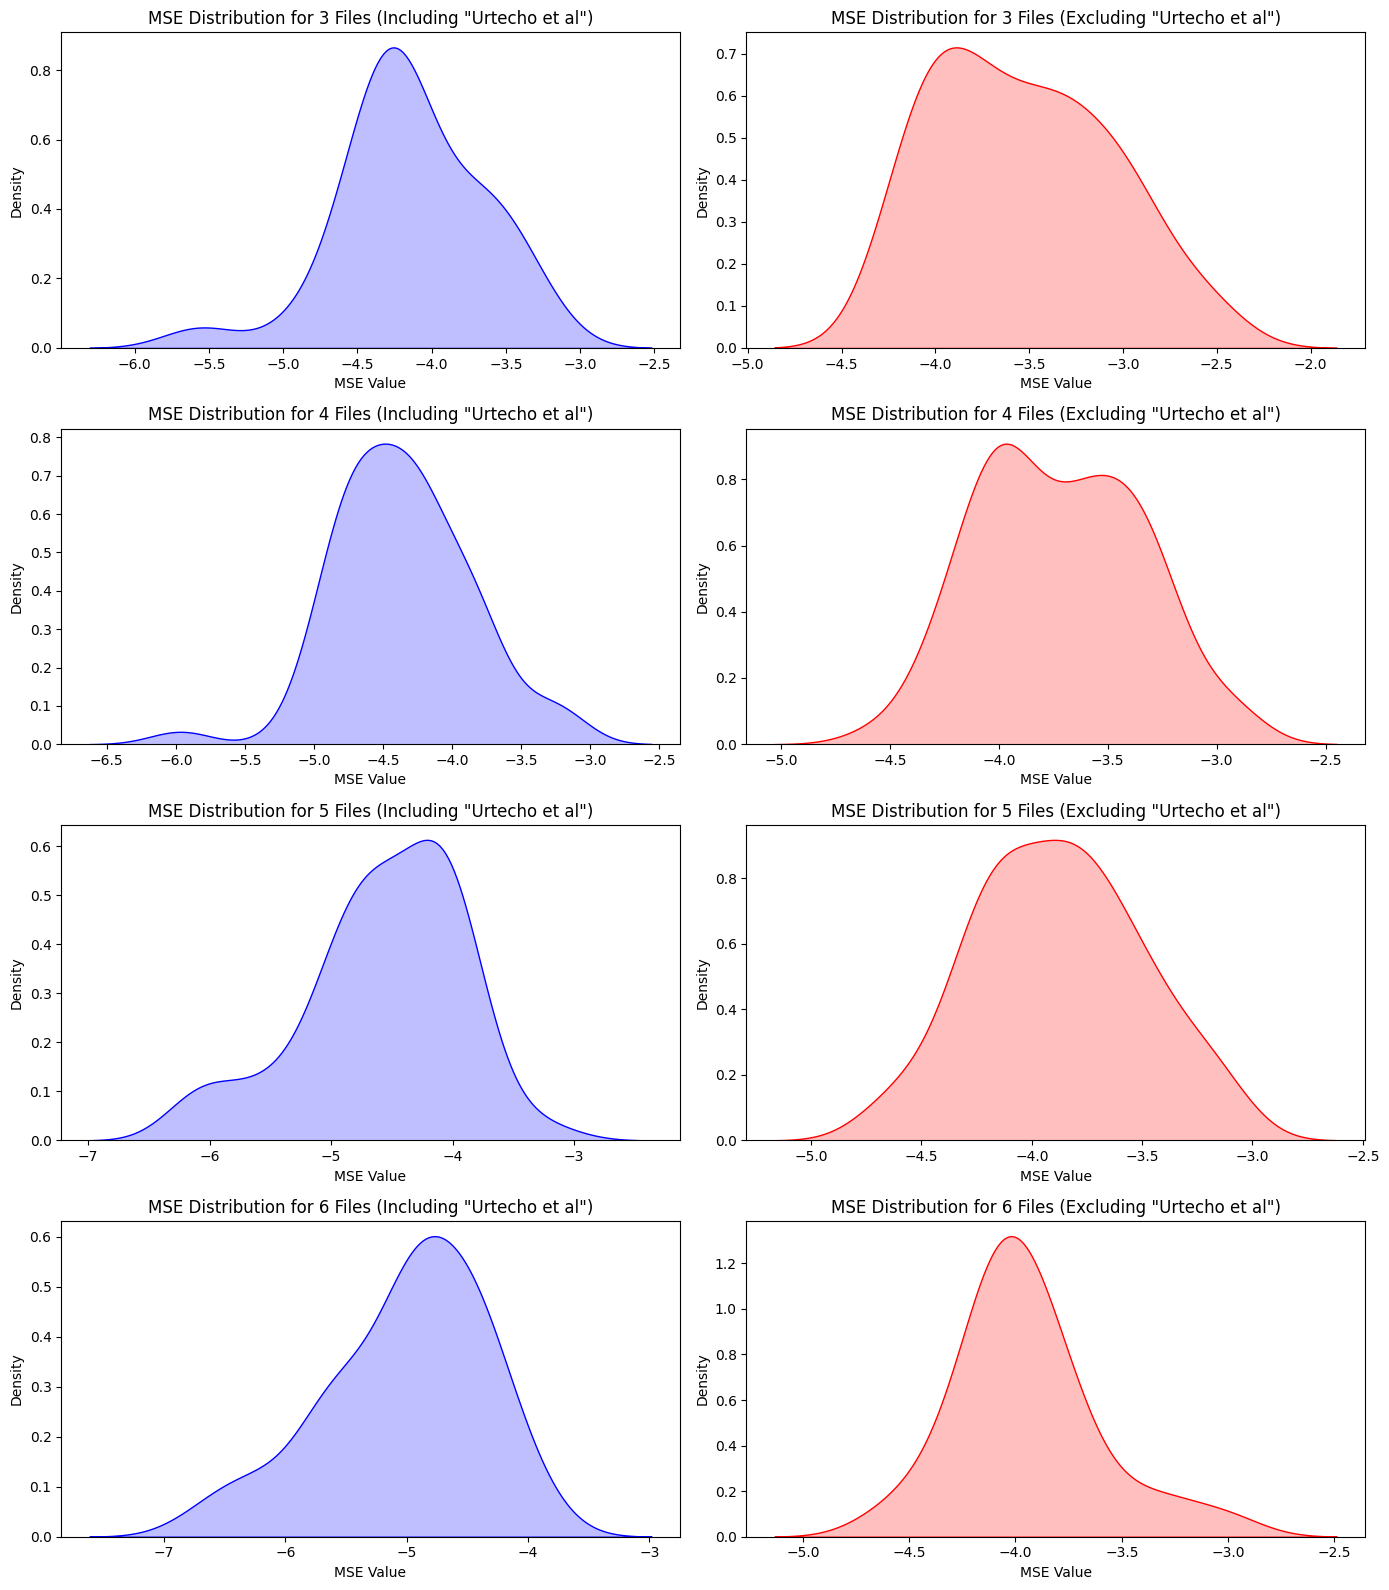

In [16]:
parent.plot_mse_distribution_with_ttest(file_mse, file_names, 'Urtecho et al', start_from=3, end_at=6)